# Second Order Systems

A second-order linear system is a common description of many dynamic processes. The response depends on whether it is an overdamped, critically damped, or underdamped second order system.

$$\tau_s^2 \frac{d^2y}{dt^2} + 2 \zeta \tau_s \frac{dy}{dt} + y = K_p \, u\left(t-\theta_p \right)$$

has output $y(t)$ and input $u(t)$ and four unknown parameters. The four parameters are the gain $K_{p}$, damping factor $\zeta$, second order time constant $\tau_{s}$, and dead time $\theta_{p}$.

### Laplace domain, Transfer function

In the Laplace domain, the second order system is a transfer function:

$$\frac{Y(s)}{U(s)} = \frac{K_p}{\tau_s^2 s^2 + 2 \zeta \tau_s s + 1}e^{-\theta_p s}$$

### State Space Form

To put the second order equation into state space form, it is split into two first order differential equations.

$$\frac{dx_1}{dt} = x_2$$
$$\tau_s^2 \frac{dx_2}{dt} = -2 \zeta \tau_s x_2 - x_1 + K_p u\left(t-\theta_p\right)$$

State $x_{1}$ is the output in state space form.

$$\begin{bmatrix}\dot x_1\\\dot x_2\end{bmatrix} = \begin{bmatrix}0&1\\-\frac{1}{\tau_s^2}&-\frac{2 \zeta}{\tau_s}\end{bmatrix} \begin{bmatrix}x_1\\x_2\end{bmatrix} + \begin{bmatrix}0\\\frac{K_p}{\tau_{s}^2}\end{bmatrix} u\left(t-\theta_p\right)$$

$$y = \begin{bmatrix}1 & 0\end{bmatrix} \begin{bmatrix}x_1\\x_2\end{bmatrix} + \begin{bmatrix}0\end{bmatrix} u$$

### Process gain, $K_{p}$

The process gain is the change in the output y induced by a unit change in the input u. The process gain is calculated by evaluating the change in y(t) divided by the change in u(t) at steady state initial and final conditions
$$K_p = \frac{\Delta y}{\Delta u} = \frac{y_{ss_2}-y_{ss_1}}{u_{ss_2}-u_{ss_1}}$$
The process gain affects the magnitude of the response, regardless of the speed of response.

### Damping Factor

The response of the second order system to a step input in $u(t)$ depends whether the system is overdamped $(\zeta>1)$, critically damped $(\zeta=1)$, or underdamped $(0 \le \zeta < 1)$.

<img src="pictures/second_order_response.png" width="500">

1. Overdamped
If the system is overdamped $(\zeta>1)$, the analytic solution to the step response of magnitude M is

$$y(t) = K_p M \left( 1-e^{-\zeta\,t/\tau_s} \left[ \cosh\left( \frac{t}{\tau_s}\sqrt{\zeta^2 - 1} \right) + \frac{\zeta}{\sqrt{\zeta^2-1}} \sinh\left( \frac{t}{\tau_s}\sqrt{\zeta^2 - 1} \right) \right] \right)$$

2. Critically Damped
If the system is critically damped $(\zeta=1)$, the analytic solution to the step response of magnitude M is

$$y(t) = K_p M \left[ 1 - \left( 1+\frac{t}{\tau_s} \right) e^{-t/\tau_s} \right]$$

3. Underdamped (oscillations)
Finally, if the system is underdamped $(0\le\zeta<1)$, the analytic solution to the step response of magnitude M is

$$y(t) = K_p M \left( 1-e^{-\zeta\,t/\tau_s} \left[ \cos\left( \frac{t}{\tau_s}\sqrt{1-\zeta^2} \right) + \frac{\zeta}{\sqrt{1-\zeta^2}} \sin\left( \frac{t}{\tau_s}\sqrt{1-\zeta^2} \right) \right] \right)$$

### Second Order Time Constant, $\tau_{s}$

The second order process time constant is the speed that the output response reaches a new steady state condition. An overdamped second order system may be the combination of two first order systems.

$$\tau_{p1} \frac{dx}{dt} = -x + K_p u \quad \quad \frac{X(s)}{U(s)}=\frac{K_p}{\tau_{p1}\,s + 1}$$

$$\tau_{p2} \frac{dy}{dt} = -y + x \quad \quad \frac{Y(s)}{X(s)}=\frac{1}{\tau_{p2}\,s + 1}$$

The combination of these two first order systems becomes

$$\frac{Y(s)}{X(s)}\frac{X(s)}{U(s)}=\frac{Y(s)}{U(s)}=\\\left(\frac{K_p}{\tau_{p1}\,s + 1}\right) \left(\frac{1}{\tau_{p2}\,s + 1}\right) = \frac{K_p}{\tau_{p1}\tau_{p2}\,s^2 + \left(\tau_{p1}+\tau_{p2}\right)s + 1}$$

with $\tau_{p1}\tau_{p2} = \tau_s^2$ and $\tau_{p1}+\tau_{p2} = 2 \zeta \tau_s$ in second order form.

### Process Time Delay, $\theta_{p}$

The time delay is expressed as a time shift in the input variable $u(t)$.

$$u\left(t-\theta_p\right)$$

The effect of $\theta_{p}$ is to delay the effect of $u(t)$. If $u(t)$ is a unit step input that starts at $t=0$ then $u(t-\theta_{p})$ would be a step input that shifts from 0 to 1 at $t=\theta_{p}$. A time delay adds $e^{-\theta_{p} \,s }$ to the second order transfer function. In the time domain, it replaces any variable $t$ with $t-\theta_{p}$ and the output response is multiplied by the step function $S(t-\theta_p)$.

### Simulate Second Order System

Kp: 2.0
taus: 1.0
zeta: 2.0
Kp: 2.0
taus: 1.0
zeta: 1.0
Kp: 2.0
taus: 1.0
zeta: 0.5


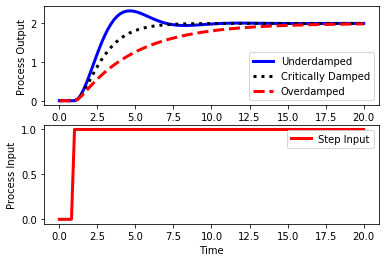

In [3]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# specify number of steps
ns = 100

# define time points
t = np.linspace(0,ns/5.0,ns+1)

class model(object):
    # default process model
    Kp = 2.0
    taus = 1.0
    thetap = 0.0
    zeta = 1.0

def process(x,t,u,Kp,taus,zeta):
    # Kp = process gain
    # taus = second order time constant
    # zeta = damping factor
    # ts^2 dy2/dt2 + 2 zeta taus dydt + y = Kp u(t-thetap)
    y = x[0]
    dydt = x[1]
    dy2dt2 = (-2.0*zeta*taus*dydt - y + Kp*u)/taus**2
    return [dydt,dy2dt2]

def calc_response(t,m):
    # t = time points
    # m = process model
    Kp = m.Kp
    taus = m.taus
    thetap = m.thetap
    zeta = m.zeta

    print('Kp: ' + str(Kp))
    print('taus: ' + str(taus))
    print('zeta: ' + str(zeta))

    # specify number of steps
    ns = len(t)-1
    delta_t = t[1]-t[0]

    # storage for recording values
    op = np.zeros(ns+1)  # controller output
    pv = np.zeros((ns+1,2))  # process variable

    # step input
    op[5:]=1.0

    # Simulate time delay
    ndelay = int(np.ceil(thetap / delta_t))

    # loop through time steps    
    for i in range(0,ns):
        # implement time delay
        iop = max(0,i-ndelay)
        inputs = (op[iop],Kp,taus,zeta)
        y = odeint(process,pv[i],[0,delta_t],args=inputs)
        pv[i+1] = y[-1]
    return (pv,op)

# overdamped step response
model.zeta = 2.0
(pv1,op1) = calc_response(t,model)

# critically damped step response
model.zeta = 1.0
(pv2,op2) = calc_response(t,model)

# underdamped step response
model.zeta = 0.5
(pv3,op3) = calc_response(t,model)

# Plot
plt.figure(1)
plt.subplot(2,1,1)
plt.plot(t,pv3[:,0],'b-',linewidth=3,label='Underdamped')
plt.plot(t,pv2[:,0],'k:',linewidth=3,label='Critically Damped')
plt.plot(t,pv1[:,0],'r--',linewidth=3,label='Overdamped')
plt.legend(loc='best')
plt.ylabel('Process Output')
plt.subplot(2,1,2)
plt.plot(t,op1,'r-',linewidth=3,label='Step Input')
plt.legend(loc='best')
plt.ylabel('Process Input')
plt.xlabel('Time')
plt.savefig('pictures/output.png')
plt.show()